# Lets have Titanic Predictions

### Importing libraries

# 1) Import Necessary Libraries

In [1]:
# # !pip install autoviz
# # !pip install xlrd
# !pip install tensorflow

In [2]:
# pip install cufflinks

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import missingno as msno 
plt.style.use('seaborn-whitegrid')

### Read The data 

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### Know our dataset

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dftc = AV.AutoViz(
    filename='', 
    sep='' , 
    depVar='target', 
    dfte=train_data, 
    header=0, 
    verbose=1, 
    lowess=False, 
    chart_format='png', 
    max_rows_analyzed=40000, 
    max_cols_analyzed=300
)

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
 

In [7]:
train_data.describe(include="all")
# Survival: Survival (0 = No; 1 = Yes)
# Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Cabin : Cabin Number
# Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# Name : Name
# Sex : Sex
# Age : Age
# Sibsp : Number of Siblings/Spouses Aboard
# Parch : Number of Parents/Children Aboard
# Ticket : Ticket Number
# Fare : Passenger Fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ohman, Miss. Velin",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
print("Training shape/size is: ", train_data.shape,train_data.size)
print("Test shape/size is: ",     test_data.shape,test_data.size)

Training shape/size is:  (891, 12) 10692
Test shape/size is:  (418, 11) 4598


### Data Analysis ###

In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
test_data.keys

<bound method NDFrame.keys of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

In [13]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#any null value 
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# or
nullVal = pd.isnull(train_data).sum().sort_values(ascending = False)
nullVal

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [16]:
# for testing
nullValTest = pd.isnull(test_data).sum().sort_values(ascending = False)
nullValTest

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

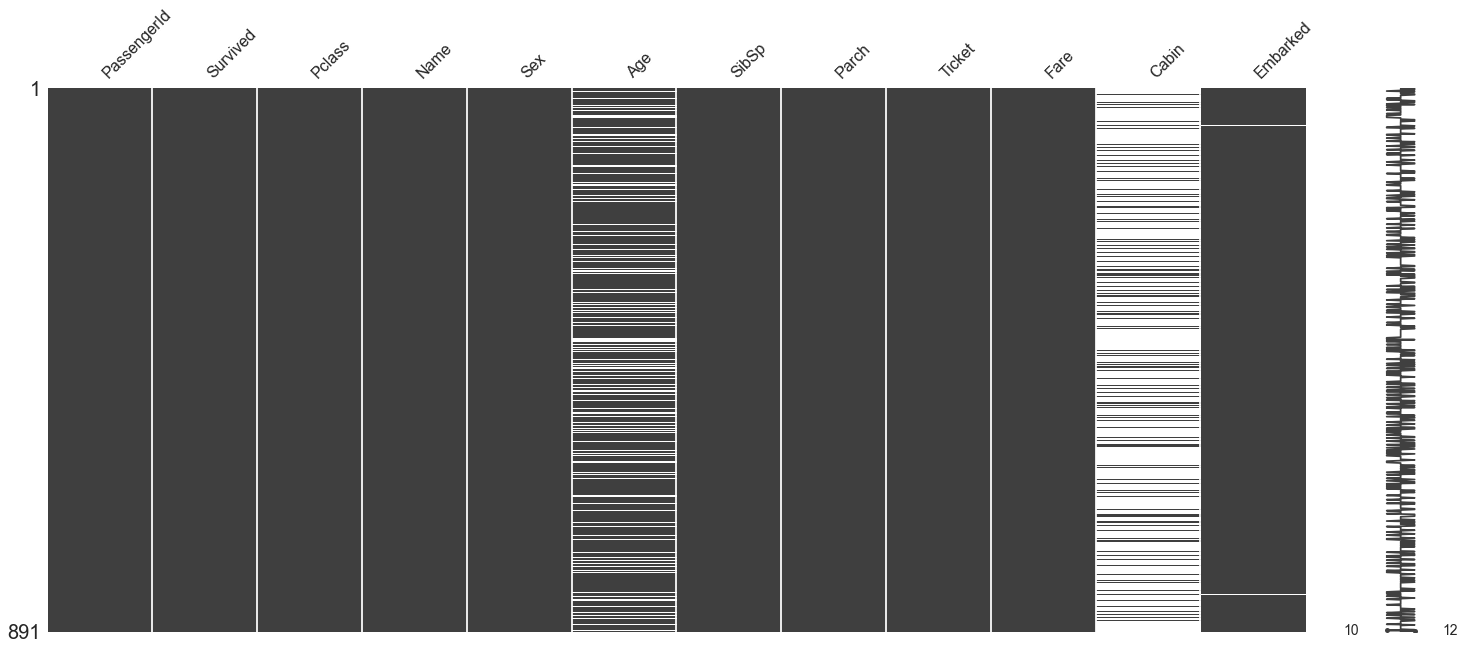

In [17]:
msno.matrix(train_data);

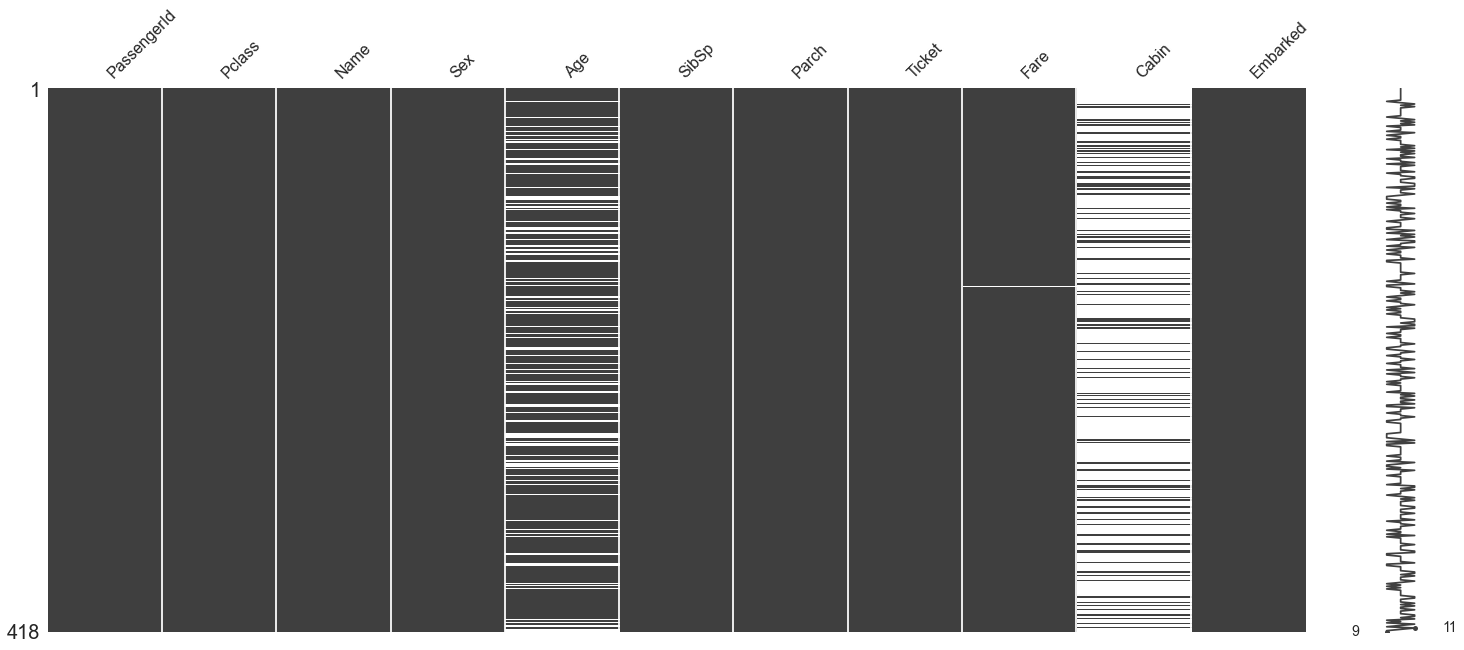

In [18]:
msno.matrix(test_data);

In [19]:
age_mean = train_data['Age'].mean()

In [20]:
age_mean

29.69911764705882

In [21]:
age_mean_test = test_data['Age'].mean()

In [22]:
age_mean_test

30.272590361445783

In [23]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [25]:
train_data['Age'] = train_data['Age'].replace(np.nan, train_data["Age"].mean())
test_data['Age'] = test_data['Age'].replace(np.nan, 30)

In [26]:
train_data['Age'].mean()

29.699117647058763

In [27]:
test_data['Age'].mean()

30.216507177033492

In [28]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [29]:
train_data['Embarked'] = train_data['Embarked'].replace(np.nan, 'Q')
test_data['Fare'] = test_data['Fare'].replace(np.nan, 35.0)

In [30]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Categorical variables 

In [32]:
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].
                                            split('.')[0].strip())
train_data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Capt              1
Ms                1
Sir               1
Don               1
Mme               1
Jonkheer          1
the Countess      1
Lady              1
Name: Title, dtype: int64

In [33]:
test_data['Title'] = test_data.Name.apply(lambda name: name.split(',')[1].
                                            split('.')[0].strip())
test_data.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [34]:
print (train_data[["Sex", "Survived"]].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending = False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [35]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [36]:
print (test_data[["Embarked", "Pclass"]].groupby(['Embarked'], as_index= False).mean().sort_values(by='Pclass', ascending = False))

  Embarked    Pclass
1        Q  2.869565
2        S  2.340741
0        C  1.794118


In [37]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


No handles with labels found to put in legend.


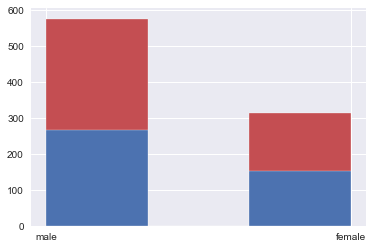

In [39]:
plt.hist(train_data.Sex, bins=train_data.Sex.unique().size*2 - 1, color="r")
plt.hist(test_data.Sex, bins=test_data.Sex.unique().size + 1)
plt.legend()
plt.show()

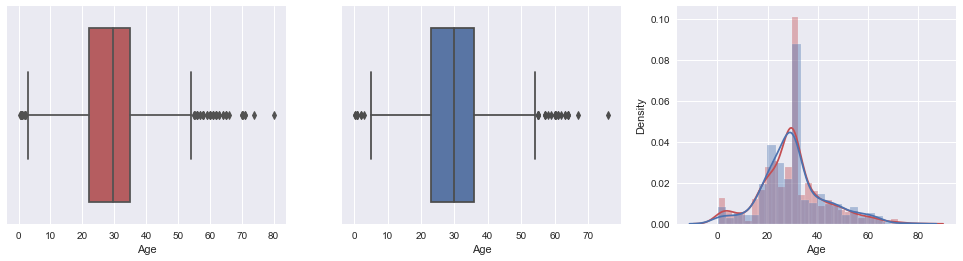

In [40]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(train_data.Age, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(test_data.Age)
plt.subplot(1, 3, 3)
sns.distplot(train_data.Age, color="r")
sns.distplot(test_data.Age)
plt.show()

### Data Visualization

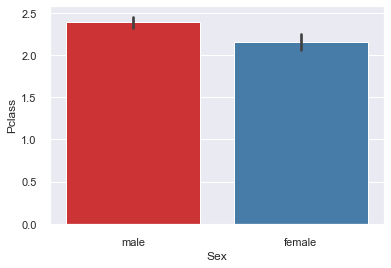

In [41]:
sns.set()
sns.barplot(x="Sex", y="Pclass", data=train_data,palette="Set1");

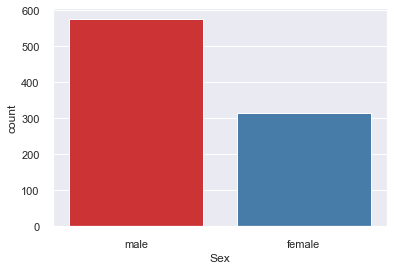

In [42]:
sns.countplot(x="Sex", data= train_data, palette="Set1");

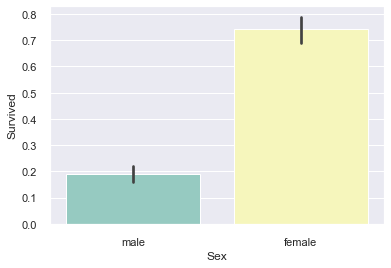

In [43]:
sns.barplot(x="Sex", y="Survived", data=train_data, palette="Set3");

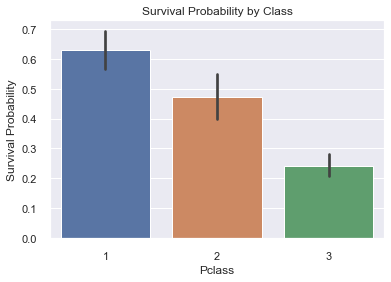

In [44]:
sns.barplot(x = 'Pclass', y ='Survived', data = train_data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Class');

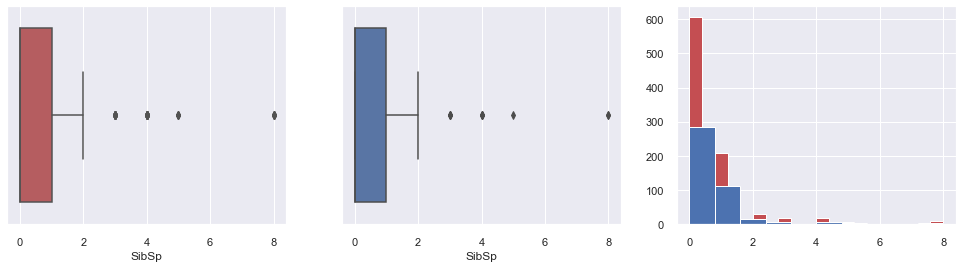

In [45]:
#siblings/spouses = SibSp
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(train_data.SibSp, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(test_data.SibSp)
plt.subplot(1, 3, 3)
plt.hist(train_data.SibSp, bins=20, color="r")
plt.hist(test_data.SibSp, bins=10)
plt.show()

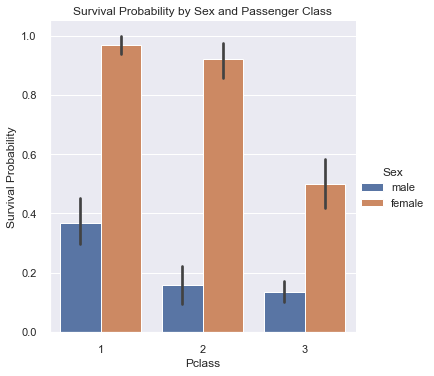

In [46]:
se = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_data, kind = 'bar')
se.despine(left = False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class');

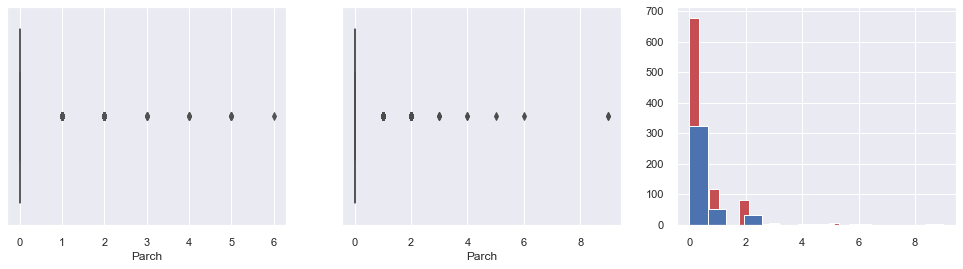

In [47]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 3, 1)
sns.boxplot(train_data.Parch, color="r")
plt.subplot(1, 3, 2)
sns.boxplot(test_data.Parch)
plt.subplot(1, 3, 3)
plt.hist(train_data.Parch, bins=17, color="r")
plt.hist(test_data.Parch, bins=7*2)
plt.show()

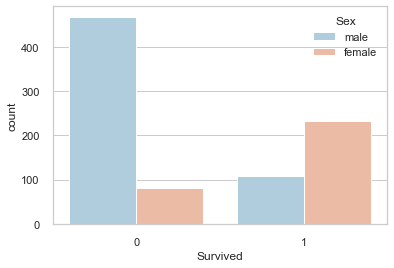

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r');

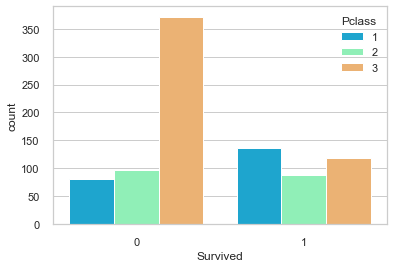

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow');

In [50]:
"""Female survived"""
train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100

74.20382165605095

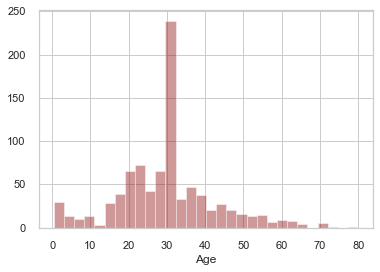

In [51]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=30);

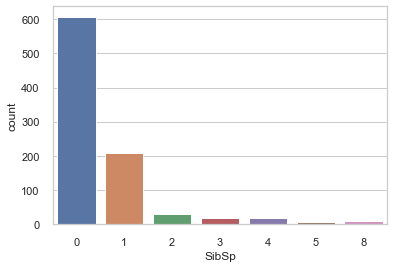

In [52]:
sns.countplot(x='SibSp',data=train_data);

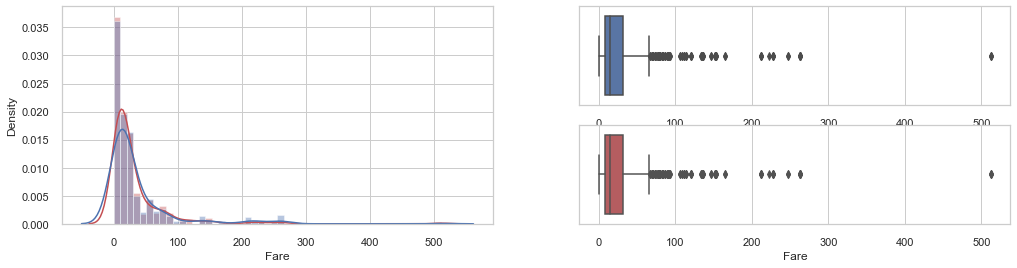

In [53]:
plt.subplots(figsize=(17, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_data.Fare, color="r")
sns.distplot(test_data.Fare)
plt.subplot(2, 2, 2)
sns.boxplot(train_data.Fare)
plt.subplot(2, 2, 4)
sns.boxplot(train_data.Fare, color="r")
plt.show()

**Cufflinks:
 
*Cufflinks connect Plotly with pandas to create graphs and charts of Dataframes directly. Its a Python library which is used to design graphs, especially interactive graphs. It can plot various graphs and charts like histogram, bar plot, boxplot, spread plot and many more.*

In [54]:
train_data['Age'].iplot(kind='hist',bins=30,color='red')

In [55]:
train_data['Sex'].iplot(kind='hist',bins=30,color='yellow')

In [56]:
cufflinks_tra=train_data['Survived'].iplot(kind='hist',bins=30,color='blue')

**Data Cleaning**

* We want to fill in missing age data instead of just dropping the missing age data rows.

* One way to do this is by filling in the mean age of all the passengers (imputation). 

* However we can be smarter about this and check the average age by passenger class. For example:

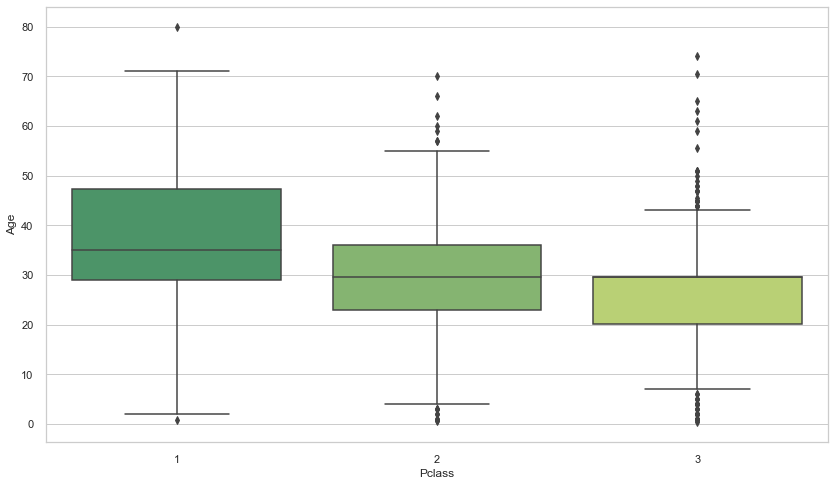

In [57]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='summer');

In [58]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

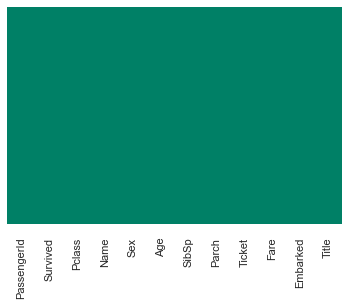

In [59]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='summer');

In [60]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [61]:
train_data_clean = train_data.dropna(inplace=False)

In [62]:
train_data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


**Converting Categorical Features:**



In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)

In [65]:
train_data.drop(['Sex','Embarked','Name','Ticket',"Embarked","Title"],axis=1,inplace=True)

In [66]:
train_data = pd.concat([train_data,sex],axis=1)

In [67]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [68]:
# train_data.drop(["male"],axis=1,inplace=True)

In [69]:
# train_data.drop(["male"],axis=1,inplace=False)

**Build a model <br>
Train Test Split**

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [73]:
empty_age = train_data[train_data['Age'].isnull()]
not_empty_age = train_data[train_data['Age'].notnull()]

In [74]:
y = not_empty_age["Age"].values
x = not_empty_age.drop("Age",axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [75]:
model = Sequential()
model.add(Dense(96,activation="relu"))
model.add(Dense(48,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=200,epochs=250);

Epoch 1/250
4/4 [==============================] - 0s 24ms/step - loss: 1001.6824 - val_loss: 371.4680
Epoch 2/250
4/4 [==============================] - 0s 3ms/step - loss: 404.7951 - val_loss: 479.4585
Epoch 3/250
4/4 [==============================] - 0s 3ms/step - loss: 412.2773 - val_loss: 374.7923
Epoch 4/250
4/4 [==============================] - 0s 3ms/step - loss: 340.6145 - val_loss: 388.6354
Epoch 5/250
4/4 [==============================] - 0s 3ms/step - loss: 351.9968 - val_loss: 386.4363
Epoch 6/250
4/4 [==============================] - 0s 3ms/step - loss: 340.5569 - val_loss: 373.0798
Epoch 7/250
4/4 [==============================] - 0s 3ms/step - loss: 336.6203 - val_loss: 381.7171
Epoch 8/250
4/4 [==============================] - 0s 3ms/step - loss: 342.2093 - val_loss: 372.6330
Epoch 9/250
4/4 [==============================] - 0s 3ms/step - loss: 329.8528 - val_loss: 379.8545
Epoch 10/250
4/4 [==============================] - 0s 3ms/step - loss: 338.3973 - val_lo

4/4 [==============================] - 0s 3ms/step - loss: 172.3676 - val_loss: 212.1964
Epoch 82/250
4/4 [==============================] - 0s 3ms/step - loss: 176.4946 - val_loss: 269.5898
Epoch 83/250
4/4 [==============================] - 0s 3ms/step - loss: 202.7749 - val_loss: 206.5845
Epoch 84/250
4/4 [==============================] - 0s 3ms/step - loss: 192.7426 - val_loss: 214.6051
Epoch 85/250
4/4 [==============================] - 0s 3ms/step - loss: 177.9028 - val_loss: 214.5840
Epoch 86/250
4/4 [==============================] - 0s 3ms/step - loss: 178.3774 - val_loss: 209.6137
Epoch 87/250
4/4 [==============================] - 0s 3ms/step - loss: 179.3574 - val_loss: 221.8287
Epoch 88/250
4/4 [==============================] - 0s 3ms/step - loss: 182.6375 - val_loss: 212.2650
Epoch 89/250
4/4 [==============================] - 0s 3ms/step - loss: 183.4033 - val_loss: 215.5758
Epoch 90/250
4/4 [==============================] - 0s 3ms/step - loss: 186.5591 - val_loss: 21

Epoch 161/250
4/4 [==============================] - 0s 3ms/step - loss: 162.1159 - val_loss: 200.1620
Epoch 162/250
4/4 [==============================] - 0s 3ms/step - loss: 160.2461 - val_loss: 200.2759
Epoch 163/250
4/4 [==============================] - 0s 3ms/step - loss: 161.4040 - val_loss: 201.7460
Epoch 164/250
4/4 [==============================] - 0s 3ms/step - loss: 158.3732 - val_loss: 212.6941
Epoch 165/250
4/4 [==============================] - 0s 3ms/step - loss: 167.9689 - val_loss: 198.9265
Epoch 166/250
4/4 [==============================] - 0s 3ms/step - loss: 159.8173 - val_loss: 197.0274
Epoch 167/250
4/4 [==============================] - 0s 3ms/step - loss: 163.5383 - val_loss: 196.3472
Epoch 168/250
4/4 [==============================] - 0s 3ms/step - loss: 163.1430 - val_loss: 195.8400
Epoch 169/250
4/4 [==============================] - 0s 3ms/step - loss: 161.6305 - val_loss: 205.8946
Epoch 170/250
4/4 [==============================] - 0s 3ms/step - loss: 

4/4 [==============================] - 0s 2ms/step - loss: 152.5495 - val_loss: 190.6241
Epoch 241/250
4/4 [==============================] - 0s 3ms/step - loss: 156.1586 - val_loss: 198.2191
Epoch 242/250
4/4 [==============================] - 0s 3ms/step - loss: 164.2056 - val_loss: 201.8792
Epoch 243/250
4/4 [==============================] - 0s 3ms/step - loss: 155.4552 - val_loss: 197.5616
Epoch 244/250
4/4 [==============================] - 0s 3ms/step - loss: 153.5230 - val_loss: 193.2660
Epoch 245/250
4/4 [==============================] - 0s 2ms/step - loss: 152.7207 - val_loss: 189.5522
Epoch 246/250
4/4 [==============================] - 0s 3ms/step - loss: 151.9760 - val_loss: 210.7003
Epoch 247/250
4/4 [==============================] - 0s 3ms/step - loss: 159.8031 - val_loss: 205.7351
Epoch 248/250
4/4 [==============================] - 0s 3ms/step - loss: 168.8970 - val_loss: 244.2755
Epoch 249/250
4/4 [==============================] - 0s 2ms/step - loss: 178.9378 - val

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4656      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


In [77]:
from matplotlib.pyplot import figure

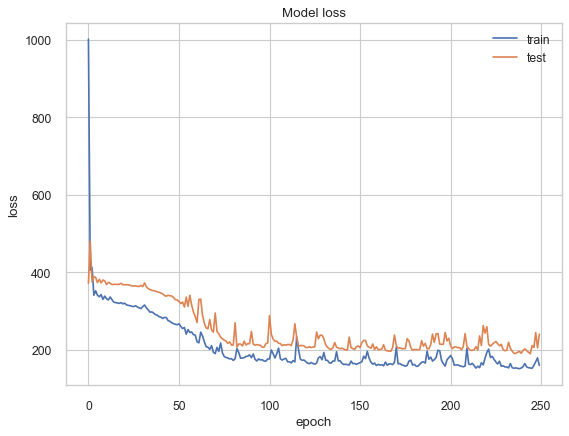

In [78]:
history = pd.DataFrame(model.history.history)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

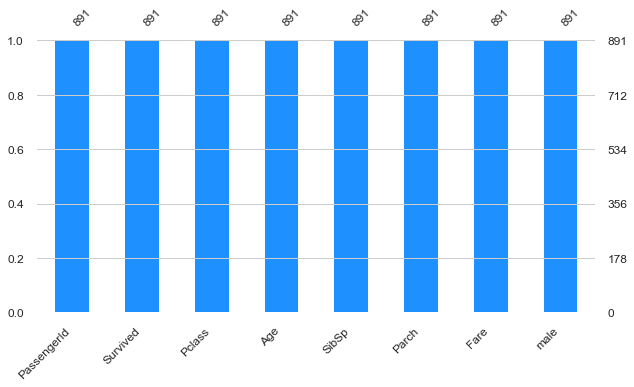

In [79]:
msno.bar(train_data,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);


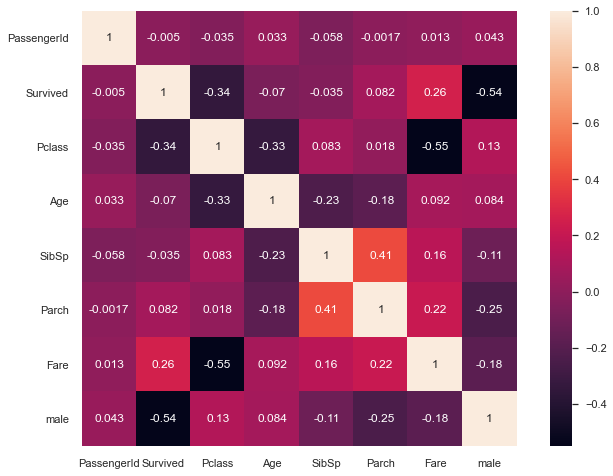

In [80]:
corr_m = train_data.corr()
plt.subplots(figsize=(12, 8))
sns.heatmap(corr_m, annot=True, square=True)
plt.show()

In [81]:
# Distrubiton
train_data.Age = np.log1p(train_data.Age)

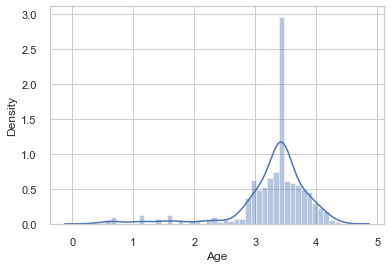

In [82]:
sns.distplot(train_data.Age)
plt.show()

In [83]:
train_data.Fare = np.log1p(train_data.Fare)

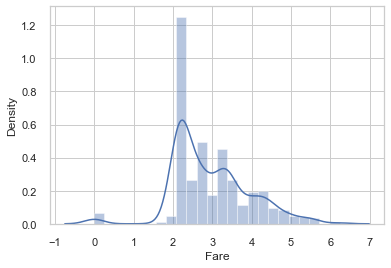

In [84]:
sns.distplot(train_data.Fare);

In [85]:
# XGBoost
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve, make_scorer
import tensorflow.keras as keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
import tensorflow as tf
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
print("Survived = {} \nDead = {}".format(train_data[train_data.Survived == 1].
                                         shape[0], train_data[train_data.Survived == 0].shape[0]))

In [ ]:
X, y = train_data.drop(columns=["Survived"]), train_data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
roc_auc = make_scorer(roc_auc_score, higher_is_better=True)

rf = RandomForestClassifier(bootstrap=True, n_estimators=700, criterion='entropy')
rf.fit(X_train, y_train)

print("Best score on train data: {:.4f}".format(roc_auc_score(rf.predict(X_train), y_train)))
print("Best score on test data: {}\n".format(roc_auc_score(rf.predict(X_test), y_test)))

In [ ]:
params={'n_neighbors' : range(1, 20), 'leaf_size' : range(1, 50)}

knn_grid = GridSearchCV(KNeighborsClassifier(), params, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

print("Best GridSearchCV params: {}".format(knn_grid.best_params_))
print("Best score on train data: {:.4f}".format(knn_grid.best_score_))
print("Best score on test data: {}\n".format(roc_auc_score(knn_grid.predict(X_test), y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
nn = Sequential()

nn.add(Dense(10, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Dense(16, kernel_initializer=keras.initializers.he_normal, activation='elu'))
nn.add(Dropout(0.3))
nn.add(Dense(32, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Dropout(0.3))
nn.add(Dense(4, kernel_initializer=keras.initializers.glorot_uniform, activation='tanh'))
nn.add(Flatten())
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.metrics.AUC(curve='ROC'))
nn.fit(X_train, y_train, epochs=500, verbose=0)
scores = nn.evaluate(X_train, y_train, verbose=0)

print("\nAccuracy on train data : {}".format(scores[1]))
scores = nn.evaluate(X_test, y_test, verbose=0)
nn_pred = np.where(nn.predict(X_test) > 0.5, 1, 0)
print("Accuracy on test data : {}".format(roc_auc_score(nn_pred, y_test)))

In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions 1.csv'

train_data.to_csv(filename,index=False)

print('Saved file: ' + filename)